In [3]:
import pandas as pd

In [4]:
df_data = pd.read_csv('../../data_NON_NSCLC/df_LUNG_Filtered_ZScore_pivot.csv',index_col=0)

# df_data = pd.read_csv('../../data_KEGG186/LUNG_CellBlind_Filtered_ZScore_pivot.csv', index_col=0)
df_data.head()

,LCLC.LCLC103H,LCLC.NCIH1299,LUAD.EKVX,LUAD.HCC827,LUAD.NCIH2228,LUAD.PC14,LUSC.NCIH2170,LUSC.RERFLCSQ1,SCLC.LU135,SCLC.NCIH146,SCLC.NCIH1963,SCLC.NCIH526
drug,,,,,,,,,,,,
5-Fluorouracil,0.477670,0.113242,0.296279,0.628404,0.044028,0.859733,-0.567961,0.270432,0.064419,0.054809,0.304989,-0.514018
ABT737,0.442016,0.524748,0.527551,0.465919,0.546333,0.370028,0.356029,0.393804,-1.130284,-0.494017,-1.151788,-2.251640
AGI-5198,0.331711,0.116441,0.392929,0.395584,0.252637,0.260275,-0.101050,0.134767,-0.591062,-0.311158,-0.006424,-1.106407
AGI-6780,0.366411,0.257240,0.320825,0.534912,0.443510,0.572516,-0.100892,0.107959,0.014283,0.133168,0.334875,-0.512449
AGK2,0.058037,0.258930,0.118013,0.484516,0.249110,0.026397,-0.397228,-0.094460,-0.206558,0.037225,0.086900,-0.496433


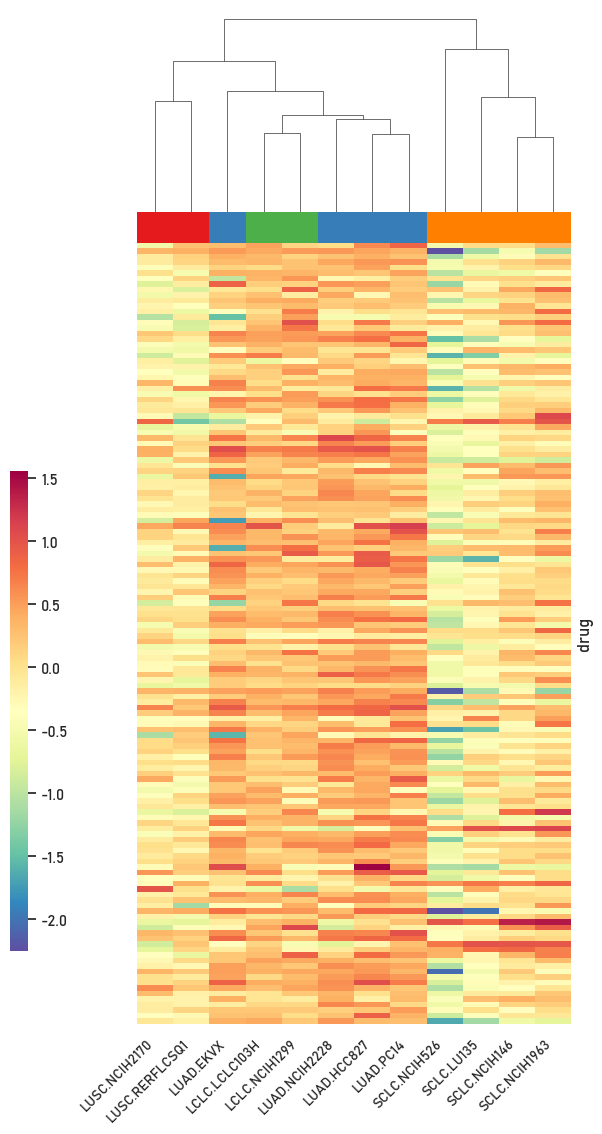

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# palette = {'LUAD':'#377EB8',
#            'LCLC':'#4DAF4A',
#            # 'NSCLC':'#ff9f9b',
#            'LUSC':'#E41A1C',
#            'SCLC':'#FF7F00'}
palette = {
    'LCLC.LCLC103H':'#4DAF4A',
    'LCLC.NCIH1299':'#4DAF4A',
    'LUAD.EKVX':'#377EB8',
    'LUAD.HCC827':'#377EB8',
    'LUAD.NCIH2228':'#377EB8',
    'LUAD.PC14':'#377EB8',
    'LUSC.NCIH2170':'#E41A1C',
    'LUSC.RERFLCSQ1':'#E41A1C',
    'SCLC.LU135':'#FF7F00',
    'SCLC.NCIH146':'#FF7F00',
    'SCLC.NCIH1963':'#FF7F00',
    'SCLC.NCIH526':'#FF7F00'}
# 创建一个新的列颜色列表，根据你的数据的列名来指定颜色
col_colors = [palette.get(col) for col in df_data.columns]
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_data.columns
heatmap_data = df_data.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(6,12),
                  # dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False, col_colors=col_colors)

ax = g.ax_heatmap
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='left',size=14)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right',size=10)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False

#设置图片名称，分辨率，并保存
plt.savefig('cluster.png',dpi = 300)
plt.show()